<a href="https://colab.research.google.com/github/mohamedelsehetryfehu/cv-medium/blob/main/cv_medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def remove_patch(base_image, patch_image):
    # Convert images to grayscale and ensure correct depth and type
    base_gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY).astype(np.uint8)
    patch_gray = cv2.cvtColor(patch_image, cv2.COLOR_BGR2GRAY).astype(np.uint8)

    # Get dimensions of base and patch images
    base_height, base_width = base_gray.shape[:2]
    patch_height, patch_width = patch_gray.shape[:2]

    # Iterate through rotations of the patch
    for angle in [0, 90, 180, 270]:
        # Rotate the patch image
        rotated_patch = cv2.rotate(patch_gray, cv2.ROTATE_90_CLOCKWISE)

        # Perform template matching to detect the patch
        result = cv2.matchTemplate(base_gray, rotated_patch, cv2.TM_CCOEFF_NORMED)

        # Adjust the threshold (change this value according to your needs)
        threshold = 1
        loc = np.where(result >= threshold)

        if len(loc[0]) > 0:
            # Assuming we take the first match found
            max_loc = (loc[1][0], loc[0][0])

            # Remove the patch by replacing pixels with background color
            base_image[max_loc[1]:max_loc[1] + patch_height, max_loc[0]:max_loc[0] + patch_width] = [255, 255, 255]  # White background

            # Inpainting to interpolate missing pixels
            mask = np.zeros_like(base_gray, dtype=np.uint8)
            mask[max_loc[1]:max_loc[1] + patch_height, max_loc[0]:max_loc[0] + patch_width] = 255
            result_image = cv2.inpaint(base_image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

            return result_image

    print("Patch not found")
    return base_image

Patch not found


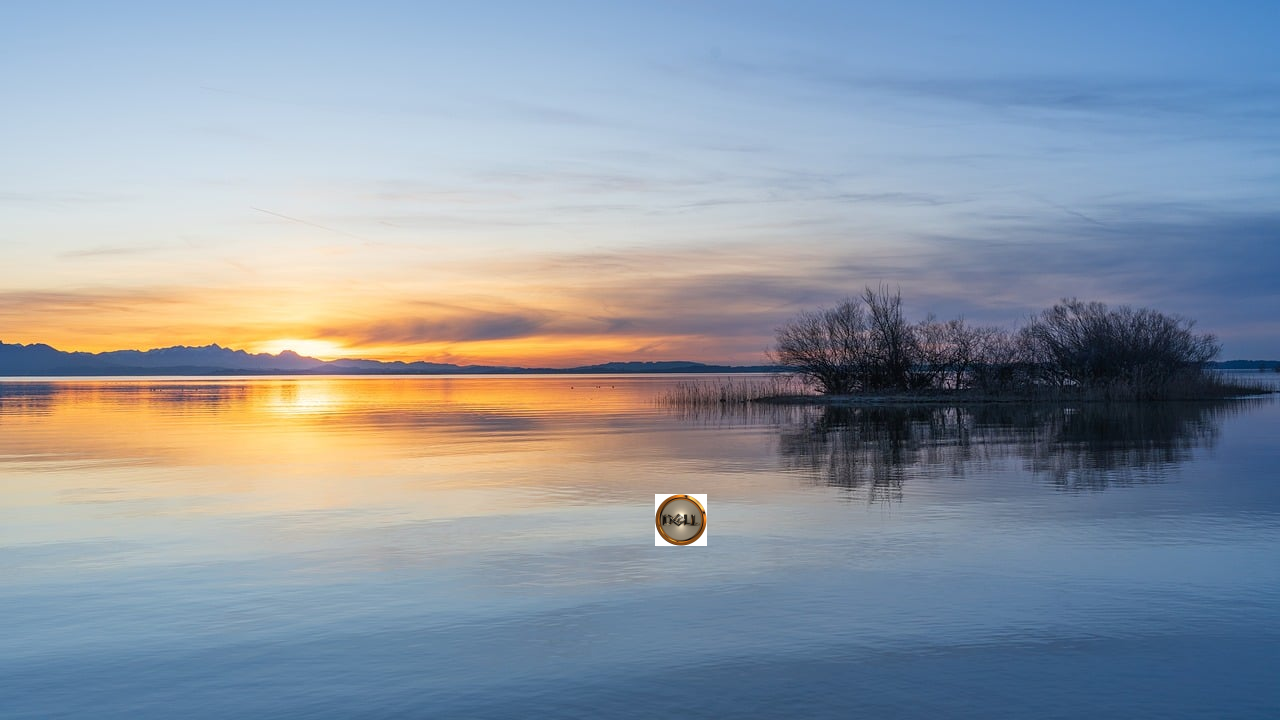

In [ ]:
# Load base image and patch image
base_image = cv2.imread('/content/combined_large_image.png')
patch_image = cv2.imread('/content/patch_image.png')

# Remove patch from base image
result_image = remove_patch(base_image, patch_image)

# Display the resulting image
cv2_imshow(result_image)

In [ ]:
from skimage.metrics import structural_similarity as ssim
import cv2

def evaluate_ssim(original_image_path, output_image):
    # Load original image
    original_image = cv2.imread(original_image_path)

    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    output_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

    # Compute SSIM
    ssim_value = ssim(original_gray, output_gray)

    return ssim_value

# Example usage:
original_image_path = 'real_large_image.png'
output_image_path = 'result_image.jpg'

original_image = cv2.imread(original_image_path)
output_image = cv2.imread(output_image_path)

ssim_value = evaluate_ssim(original_image_path, output_image)
print("SSIM:", ssim_value)

SSIM: 0.9058436744803067
